In [54]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9c736d56-14de-4a5a-87a3-2e640dfe3d0c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
    

In [58]:
type(data)


dict

In [60]:
import pandas as pd

# this allows to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [183]:
# This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11637,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974282e+07,1.974282e+07,False,NaN,1,NaN,NaN,None,2024-08-21T04:50:00.000Z,59386.606502,2.801368e+10,0.5886,0.207854,-2.566628,-2.714255,-12.560884,-7.599203,-14.524191,1.172459e+12,55.7661,1.247119e+12,None,2024-08-21T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 15:34:36.835290
1,1027,Ethereum,ETH,ethereum,9230,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202914e+08,1.202914e+08,True,NaN,2,NaN,NaN,None,2024-08-21T04:49:00.000Z,2590.615632,1.247853e+10,1.5403,0.045330,-2.844078,-4.756247,-26.331535,-26.034610,-31.591938,3.116287e+11,14.8221,3.116287e+11,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 15:34:36.835290
2,825,Tether USDt,USDT,tether,94665,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.172945e+11,1.202584e+11,True,NaN,3,NaN,NaN,None,2024-08-21T04:49:00.000Z,1.000138,4.986374e+10,2.1243,-0.010993,-0.033887,-0.032869,0.003775,0.073700,0.070166,1.173106e+11,5.5810,1.202750e+11,None,2024-08-21T04:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-21 15:34:36.835290
3,1839,BNB,BNB,bnb,2212,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459359e+08,1.459359e+08,False,NaN,4,NaN,NaN,None,2024-08-21T04:49:00.000Z,562.939808,2.038709e+09,12.6606,-0.146065,-1.405812,6.763480,-6.273794,-3.704336,-8.601489,8.215315e+10,3.9075,8.215315e+10,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 15:34:36.835290
4,5426,Solana,SOL,solana,720,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.664316e+08,5.827289e+08,True,NaN,5,NaN,NaN,None,2024-08-21T04:49:00.000Z,142.562250,1.836384e+09,-15.5146,0.108589,-2.885307,-1.645206,-21.341617,5.646070,-19.892800,6.649554e+10,3.1635,8.307514e+10,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 15:34:36.835290
5,3408,USDC,USDC,usd-coin,21582,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.480545e+10,3.480545e+10,False,NaN,6,NaN,NaN,None,2024-08-21T04:49:00.000Z,1.000055,5.024872e+09,-0.3698,-0.001600,0.015863,-0.001106,0.015395,0.009612,0.005944,3.480737e+10,1.6556,3.480737e+10,None,2024-08-21T04:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-21 15:34:36.835290
6,52,XRP,XRP,xrp,1366,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.611308e+10,9.998734e+10,False,NaN,7,NaN,NaN,None,2024-08-21T04:50:00.000Z,0.595962,1.238821e+09,-25.7556,-0.223379,-2.377711,2.662484,0.094835,22.263164,12.721661,3.344126e+10,1.5907,5.959620e+10,None,2024-08-21T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 15:34:36.835290
7,11419,Toncoin,TON,toncoin,516,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.525474e+09,5.110799e+09,True,NaN,8,3.414167e+09,2.265341e+10,None,2024-08-21T04:49:00.000Z,6.635121,2.410594e+08,-31.2081,-0.090123,-2.871163,-0.291278,-7.349912,-6.976392,1.351501,1.675682e+10,0.7970,3.391077e+10,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 15:34:36.835290
8,74,Dogecoin,DOGE,dogecoin,1038,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [185]:

def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9c736d56-14de-4a5a-87a3-2e640dfe3d0c',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)
    df

    file_path = '/home/jonathan/Downloads/API.csv'
    if not os.path.isfile(file_path):
        df.to_csv(file_path, index=False, header=True)
    else:
        df.to_csv(file_path, mode='a', index=False, header=False)



In [317]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully!')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!
API Runner completed successfully!


KeyboardInterrupt: 

In [319]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11637,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19742815.00000,19742815.00000,False,NaN,1,NaN,NaN,None,2024-08-21T04:50:00.000Z,59386.60650,28013675963.06606,0.58860,0.20785,-2.56663,-2.71425,-12.56088,-7.59920,-14.52419,1172458785646.23340,55.76610,1247118736541.41992,None,2024-08-21T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 16:42:51.562629
1,1027,Ethereum,ETH,ethereum,9230,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120291369.66511,120291369.66511,True,NaN,2,NaN,NaN,None,2024-08-21T04:49:00.000Z,2590.61563,12478528628.17811,1.54030,0.04533,-2.84408,-4.75625,-26.33154,-26.03461,-31.59194,311628702696.91821,14.82210,311628702696.91998,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 16:42:51.562629
2,825,Tether USDt,USDT,tether,94665,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,117294453952.96539,120258419915.70276,True,NaN,3,NaN,NaN,None,2024-08-21T04:49:00.000Z,1.00014,49863737048.56174,2.12430,-0.01099,-0.03389,-0.03287,0.00377,0.07370,0.07017,117310593696.21138,5.58100,120274967501.33000,None,2024-08-21T04:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-21 16:42:51.562629
3,1839,BNB,BNB,bnb,2212,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935935.30588,145935935.30588,False,NaN,4,NaN,NaN,None,2024-08-21T04:49:00.000Z,562.93981,2038709353.84047,12.66060,-0.14606,-1.40581,6.76348,-6.27379,-3.70434,-8.60149,82153147433.20825,3.90750,82153147433.21001,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 16:42:51.562629
4,5426,Solana,SOL,solana,720,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466431640.85204,582728908.09712,True,NaN,5,NaN,NaN,None,2024-08-21T04:49:00.000Z,142.56225,1836383503.93119,-15.51460,0.10859,-2.88531,-1.64521,-21.34162,5.64607,-19.89280,66495544276.41939,3.16350,83075144385.00999,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 16:42:51.562629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2010,Cardano,ADA,cardano,1228,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35948180703.99100,37143587993.98700,False,NaN,11,NaN,NaN,None,2024-08-21T08:41:00.000Z,0.35568,264230707.53789,19.27000,-0.52953,3.41296,4.70720,-18.08750,-5.20090,-26.44108,12786201688.79513,0.60700,16005791245.28000,None,2024-08-21T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT
146,5805,Avalanche,AVAX,avalanche,765,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,404768649.92391,444771749.92391,False,NaN,12,NaN,NaN,None,2024-08-21T08:41:00.000Z,23.09557,301997736.50721,45.04220,-1.00838,5.29888,8.37996,-27.75155,-8.02705,-41.91172,9348364051.43236,0.44380,16530627052.80000,None,2024-08-21T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT
147,5994,Shiba Inu,SHIB,shiba-inu,859,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,589270344163599.75000,589519059475308.62500,False,NaN,13,NaN,NaN,None,2024-08-21T08:41:00.000Z,0.00001,180755714.67326,-16.71820,-0.42513,-0.36648,-0.63331,-22.67319,-23

In [321]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [323]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11637,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19742815.00000,19742815.00000,False,NaN,1,NaN,NaN,None,2024-08-21T04:50:00.000Z,59386.60650,28013675963.06606,0.58860,0.20785,-2.56663,-2.71425,-12.56088,-7.59920,-14.52419,1172458785646.23340,55.76610,1247118736541.41992,None,2024-08-21T04:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 16:42:51.562629
1,1027,Ethereum,ETH,ethereum,9230,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120291369.66511,120291369.66511,True,NaN,2,NaN,NaN,None,2024-08-21T04:49:00.000Z,2590.61563,12478528628.17811,1.54030,0.04533,-2.84408,-4.75625,-26.33154,-26.03461,-31.59194,311628702696.91821,14.82210,311628702696.91998,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 16:42:51.562629
2,825,Tether USDt,USDT,tether,94665,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,117294453952.96539,120258419915.70276,True,NaN,3,NaN,NaN,None,2024-08-21T04:49:00.000Z,1.00014,49863737048.56174,2.12430,-0.01099,-0.03389,-0.03287,0.00377,0.07370,0.07017,117310593696.21138,5.58100,120274967501.33000,None,2024-08-21T04:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-21 16:42:51.562629
3,1839,BNB,BNB,bnb,2212,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935935.30588,145935935.30588,False,NaN,4,NaN,NaN,None,2024-08-21T04:49:00.000Z,562.93981,2038709353.84047,12.66060,-0.14606,-1.40581,6.76348,-6.27379,-3.70434,-8.60149,82153147433.20825,3.90750,82153147433.21001,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 16:42:51.562629
4,5426,Solana,SOL,solana,720,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466431640.85204,582728908.09712,True,NaN,5,NaN,NaN,None,2024-08-21T04:49:00.000Z,142.56225,1836383503.93119,-15.51460,0.10859,-2.88531,-1.64521,-21.34162,5.64607,-19.89280,66495544276.41939,3.16350,83075144385.00999,None,2024-08-21T04:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 16:42:51.562629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2010,Cardano,ADA,cardano,1228,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35948180703.99100,37143587993.98700,False,NaN,11,NaN,NaN,None,2024-08-21T08:41:00.000Z,0.35568,264230707.53789,19.27000,-0.52953,3.41296,4.70720,-18.08750,-5.20090,-26.44108,12786201688.79513,0.60700,16005791245.28000,None,2024-08-21T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT
146,5805,Avalanche,AVAX,avalanche,765,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,404768649.92391,444771749.92391,False,NaN,12,NaN,NaN,None,2024-08-21T08:41:00.000Z,23.09557,301997736.50721,45.04220,-1.00838,5.29888,8.37996,-27.75155,-8.02705,-41.91172,9348364051.43236,0.44380,16530627052.80000,None,2024-08-21T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT
147,5994,Shiba Inu,SHIB,shiba-inu,859,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,589270344163599.75000,589519059475308.62500,False,NaN,13,NaN,NaN,None,2024-08-21T08:41:00.000Z,0.00001,180755714.67326,-16.71820,-0.42513,-0.36648,-0.63331,-22.67319,-23

In [211]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.09596,-2.31418,-2.26411,-11.90807,-7.42222,-14.30756
Ethereum,0.02947,-2.74847,-4.54890,-25.67270,-25.73255,-31.41218
Tether USDt,-0.01979,-0.02866,-0.02778,0.00002,0.07854,0.06311
BNB,0.08260,-1.29404,6.81316,-5.70223,-3.88726,-8.45234
Solana,0.11770,-2.67928,-1.31950,-20.32902,6.01837,-19.30638
USDC,-0.01583,0.00861,0.00061,0.00511,0.00427,-0.00338
XRP,-0.28845,-2.34001,3.22218,0.59597,22.48985,13.02453
Toncoin,0.08092,-2.76717,-0.31433,-6.44256,-7.08205,2.82116
Dogecoin,-0.15200,-0.82831,-1.62871,-25.22707,-16.21126,-37.45928


In [325]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.09596
              quote.USD.percent_change_24h    -2.31418
              quote.USD.percent_change_7d     -2.26411
              quote.USD.percent_change_30d   -11.90807
              quote.USD.percent_change_60d    -7.42222
                                                ...   
Bitcoin Cash  quote.USD.percent_change_24h    -1.89752
              quote.USD.percent_change_7d     -2.58724
              quote.USD.percent_change_30d   -14.19068
              quote.USD.percent_change_60d   -12.01506
              quote.USD.percent_change_90d   -33.70122
Length: 90, dtype: float64

In [327]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.09596
             quote.USD.percent_change_24h  -2.31418
             quote.USD.percent_change_7d   -2.26411
             quote.USD.percent_change_30d -11.90807
             quote.USD.percent_change_60d  -7.42222
...                                             ...
Bitcoin Cash quote.USD.percent_change_24h  -1.89752
             quote.USD.percent_change_7d   -2.58724
             quote.USD.percent_change_30d -14.19068
             quote.USD.percent_change_60d -12.01506
             quote.USD.percent_change_90d -33.70122

[90 rows x 1 columns]

In [329]:
df5.count()

values    90
dtype: int64

In [331]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.09596
1,Bitcoin,quote.USD.percent_change_24h,-2.31418
2,Bitcoin,quote.USD.percent_change_7d,-2.26411
3,Bitcoin,quote.USD.percent_change_30d,-11.90807
4,Bitcoin,quote.USD.percent_change_60d,-7.42222
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-1.89752
86,Bitcoin Cash,quote.USD.percent_change_7d,-2.58724
87,Bitcoin Cash,quote.USD.percent_change_30d,-14.19068
88,Bitcoin Cash,quote.USD.percent_change_60d,-12.01506


In [333]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.09596
1,Bitcoin,quote.USD.percent_change_24h,-2.31418
2,Bitcoin,quote.USD.percent_change_7d,-2.26411
3,Bitcoin,quote.USD.percent_change_30d,-11.90807
4,Bitcoin,quote.USD.percent_change_60d,-7.42222
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,-1.89752
86,Bitcoin Cash,quote.USD.percent_change_7d,-2.58724
87,Bitcoin Cash,quote.USD.percent_change_30d,-14.19068
88,Bitcoin Cash,quote.USD.percent_change_60d,-12.01506


In [345]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.09596
1,Bitcoin,24h,-2.31418
2,Bitcoin,7d,-2.26411
3,Bitcoin,30d,-11.90807
4,Bitcoin,60d,-7.42222
...,...,...,...
85,Bitcoin Cash,24h,-1.89752
86,Bitcoin Cash,7d,-2.58724
87,Bitcoin Cash,30d,-14.19068
88,Bitcoin Cash,60d,-12.01506


In [347]:
import seaborn as sns
import matplotlib as plt

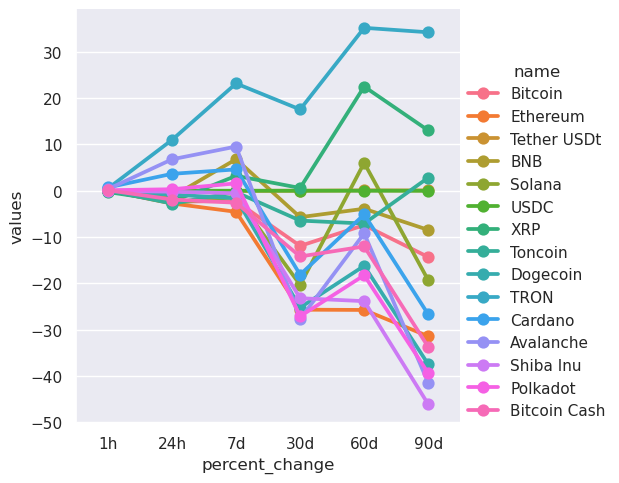

In [349]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [359]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name =='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,59386.60650,2024-08-21 16:42:51.562629
15,Bitcoin,59694.68824,2024-08-21 16:42:51.562629
30,Bitcoin,59494.52928,2024-08-21 16:42:51.562629
45,Bitcoin,59494.52928,2024-08-21 16:42:51.562629
60,Bitcoin,59494.52928,2024-08-21 16:42:51.562629
75,Bitcoin,59544.32225,2024-08-21 16:42:51.562629
90,Bitcoin,59544.32225,2024-08-21 16:42:51.562629
105,Bitcoin,59557.14503,2024-08-21 16:42:51.562629
120,Bitcoin,59557.14503,2024-08-21 16:42:51.562629
135,Bitcoin,59547.25616,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

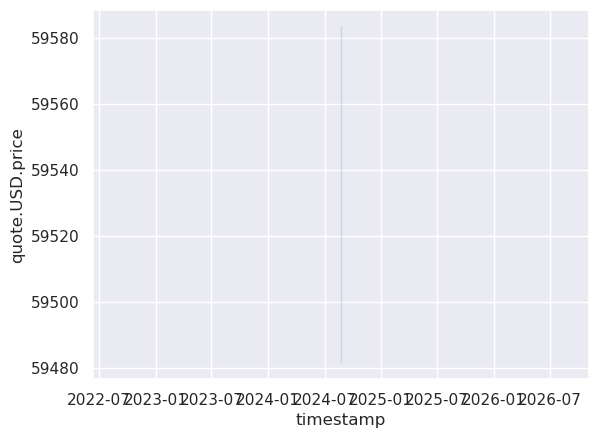

In [365]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data= df10)